# Beispiel: Random Forest
## Datensatz "Weinqualität"

Wir laden den Datensatz *weinqualitaet.csv* in den Speicher:

In [43]:
# Datensatz laden
url = "https://raw.githubusercontent.com/troescherw/datasets/master/weinqualitaet.csv"

import pandas as pd
daten = pd.read_csv(url, delimiter=",")
# Löschen von Zeilen mit leeren Einträgen
daten.dropna(inplace=True)

## Beschreibung des Datensatzes

- **type**: white wine or red whine
- **fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

- **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

- **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines

- **residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

- **chlorides**: the amount of salt in the wine

- **free sulfur dioxide**: the free form of $S0_2$ exists in equilibrium between molecular $S0_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

- **total sulfur**: dioxideamount of free and bound forms of $S0_2$; in low concentrations, $S0_2$ is mostly undetectable in wine, but at free $S0_2$ concentrations over 50 ppm, $S0_2$ becomes evident in the nose and taste of wine

- **density**: the density of water is close to that of water depending on the percent alcohol and sugar content

- **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

- **sulphates**: a wine additive which can contribute to sulfur dioxide gas ($S0_2$) levels, wich acts as an antimicrobial and antioxidant

- **alcohol**: the percent alcohol content of the wine

- **quality**: output variable (based on sensory data, score between 0 and 10)

In [44]:
# Datensatz anzeigen
daten

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Einige Statistiken zum Datensatz:

In [45]:
daten.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Wie viele Weine haben welche Qualitätsstufe erhalten?

In [46]:
daten["quality"].groupby(daten.quality).count()

quality
3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
Name: quality, dtype: int64

Dargestellt als Grafik:

<AxesSubplot:xlabel='quality'>

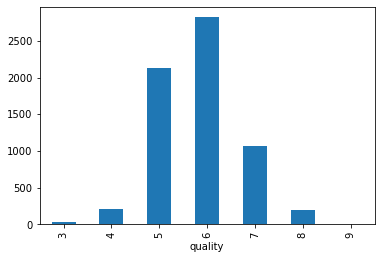

In [47]:
daten["quality"].groupby(daten.quality).count().plot.bar()

Gibt es Abhängigkeiten zwischen den Features? Wir berechnen die sog. **Korrelationskoeffizienten r**, die immer zwischen den Werten -1 und +1 liegen.

- Nahe -1: Hohe negative Korrelation
- Nahe +1: Hohe positive Korrelation
- Nahe 0: Keine Korrelation


$r = \frac{Cov_{x,y}}{s_x s_y}$


<AxesSubplot:>

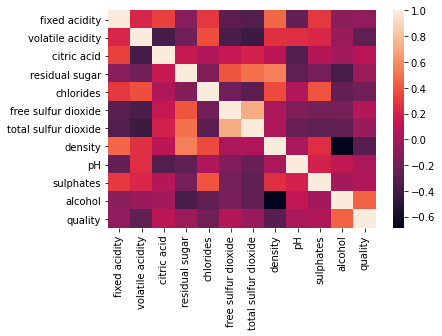

In [48]:
corrs = daten.corr()

import seaborn as sn
sn.heatmap(corrs)

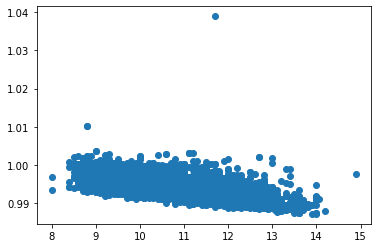

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(daten.alcohol, daten.density)

Etwas deutlicher zeigt sich der Zusammenhang, wenn wir die Ausreißer entfernen:

[]

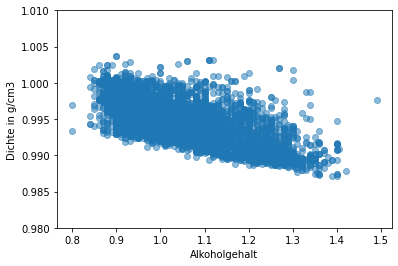

In [50]:
plt.scatter(daten[daten.density<1.01].alcohol/10, daten[daten.density<1.01].density,alpha=.5)
plt.ylim(.98,1.01)
plt.xlabel("Alkoholgehalt")
plt.ylabel("Dichte in g/cm3")
plt.plot()

## Vorhersage-Modell erstellen: Decision Tree

Wir wollen anhand der Daten die Weinqualität vorhersagen! Dazu teilen wir den Datensatz in Trainings- und Testdaten auf. Mit 70% der Daten trainieren wir das Modell, mit 30% testen wir das Modell.

In [51]:
from sklearn.model_selection import train_test_split

X = daten.iloc[:, 0: 12]
X = pd.DataFrame(X, columns = daten.columns[0:12])
X = pd.get_dummies(X)
y = daten.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

Jetzt erstellen wir das Modell mit den Trainings-Daten. Als Modell verwenden wir einen Entscheidungsbaum für Klassifizierung:

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=6)
model = model.fit(X_train, y_train)

Wir sagen mit Hilfe des Modells die Weinqualität voraus und verwenden hierfür den Test-Datensatz:

In [53]:
pred = model.predict(X_test)

Wir vergleichen die vorhergesagte Weinqualität mit der tatsächlichen Weinqualität und stellen dies in einer Tabelle dar:

In [54]:
pd.crosstab(y_test, pred, rownames=["REFERENZ"], colnames=["VORHERGESAGT"])

VORHERGESAGT,3,4,5,6,7,8
REFERENZ,,,,,,
3,1,0,4,4,0,0
4,0,2,33,29,0,0
5,0,2,390,239,6,1
6,0,4,194,578,70,0
7,0,0,18,190,114,0
8,0,0,4,22,26,6
9,0,0,1,0,1,0


Wir setzen die richtig vorhergesagten Werte (die Diagonale in der obigen Tabelle) mit der Gesamtzahl der vorhergesagten Werte ins Verhältnis. Dies gibt die Genauigkeit unseres Modells an, die sog. **Accuracy**:

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5626611655492522

Welches Feature (=Spalte) hat welche Wichtigkeit auf die Vorhersage?

<AxesSubplot:>

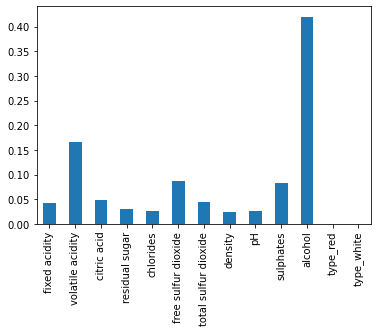

In [56]:
pd.Series(model.feature_importances_, index=X.columns).plot.bar()

## Random Forest
Statt nur einen Baum, erstellen wir jetzt gleich eine ganze Menge, genauer gesagt: 500! Für jeden Baum werden zufällig Beobachtungen und Features (Spalten der Tabelle) ausgewählt und jeder Baum für sich trainiert! Somit entscheidet jeder Baum für sich, um welche Weinqualität es sind handelt. Am Ende erfolgt eine "Mehrheitsentscheidung".

Zuerst erstellen wir einen **Random Forest** mit 500 Bäumen.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=500)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Jetzt testen wir wieder unser Modell, indem wir eine Vorhersage mit dem Test-Datensatz durchführen:

In [58]:
pred2 = model2.predict(X_test)

Nun stellen wir wieder die vorhergesagte Weinqualität mit der tatsächlichen in einer Tabelle gegenüber:

In [59]:
pd.crosstab(y_test, pred2, rownames=["PREDICTED"], colnames=["REFERENCE"])

REFERENCE,3,4,5,6,7,8
PREDICTED,,,,,,
3,0,0,3,6,0,0
4,1,8,32,22,1,0
5,0,2,454,180,2,0
6,0,1,110,700,34,1
7,0,0,6,154,162,0
8,0,0,1,22,8,27
9,0,0,0,0,2,0


Wir berechnen wieder die Accuracy:

In [60]:
accuracy_score(y_test, pred2)

0.6967509025270758

Unser *Random Forest* - Modell hat nun eine deutlich höhere Accuracy! Ein Random Forest scheint als Modell also besser zu sein als nur ein einzelner Baum!

Die Qualität der Weine ist mit 10 Qualitätsstufen sehr fein aufgelöst. Es ist zu vermuten, dass auch menschliche Sommeliere nicht bei jedem Wein die exakt gleiche Qualitätsstufe wählen würden. Wir unterteilen unsere Weine deshalb in 3 Kategorien: In die Weine mit eher geringer Qualität (Stufe 1-3), in Weine mit guter Qualtiät (Stufe 4-6) und Weine mit hervorragender Qualität (Stufe 7-10).

In [61]:
y_train_qualitaetsgruppen = pd.cut(y_train, 3, labels=[1,2,3])
y_test_qualitaetsgruppen  = pd.cut(y_test, 3, labels=[1,2,3])

Nun erstellen wir einen Random Forest, der die neu erstellten Qualitätskategegorien vorhersagen soll. Wir geben das Ergebnis in einer Confusion Matri aus.

In [62]:
model3 = RandomForestClassifier(n_estimators=500).fit(X_train, y_train_qualitaetsgruppen)

pred3 = model3.predict(X_test)
pd.crosstab(y_test_qualitaetsgruppen, pred3, rownames=["PREDICTED"], colnames=["REFERENCE"])

REFERENCE,1,2,3
PREDICTED,,,
1,507,204,0
2,117,1049,2
3,1,32,27


Wir berechnen die Accuracy unsers neuen Modells.

In [63]:
accuracy_score(y_test_qualitaetsgruppen, pred3)

0.816400206291903

Unser Modell hat sich nun deutlich verbessert! Allerdings ist unsere Vorgehensweise nicht unkritisch: Wir haben *willkürlich* neue Kategorie erstellt und damit die vermeintliche Qualtiät unseres Vorhersagemodells verbessert! Anders ausgedrückt: Wir haben unsere Statistik manipuliert! Im wissenschaftlichen Umfeld ist eine solche Vorgehensweise mindestens fragwürdig, wenn auch leider immer wieder anzutreffen ("Man muss die Daten nur lange genug foltern, irgendwann gestehen sie").